In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
end = dt.datetime.today()
start = dt.datetime(end.year - 10, end.month, end.day)

In [3]:
tickers = ["AAPL", "AMZN", "GOOG", "MSFT", "FB"]
df = yf.download(tickers, start, end)['Adj Close']
df.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2011-06-03,10.547321,188.320007,NaN,260.563354,19.159355
2011-06-06,10.381486,185.690002,NaN,259.557129,19.239487
2011-06-07,10.197216,187.550003,NaN,258.545898,19.279551
2011-06-08,10.203362,188.050003,NaN,258.615631,19.183393
2011-06-09,10.180327,189.679993,NaN,257.400208,19.199417


In [4]:
#now get the volatility of each 
volatility_array = []

#go through all of the columns
for i in df.columns:
    
    #get the logarithmic return
    log_ret = np.log(df[i] / df[i].shift(1))
    
    #then get the volatility 
    vol = round(log_ret.rolling(window = 252).std() * np.sqrt(252),4)[-1]
    
    #then append that into a list
    volatility_array.append(vol)
    
print(volatility_array)

[0.3523, 0.3136, 0.3623, 0.2852, 0.2791]


<AxesSubplot:>

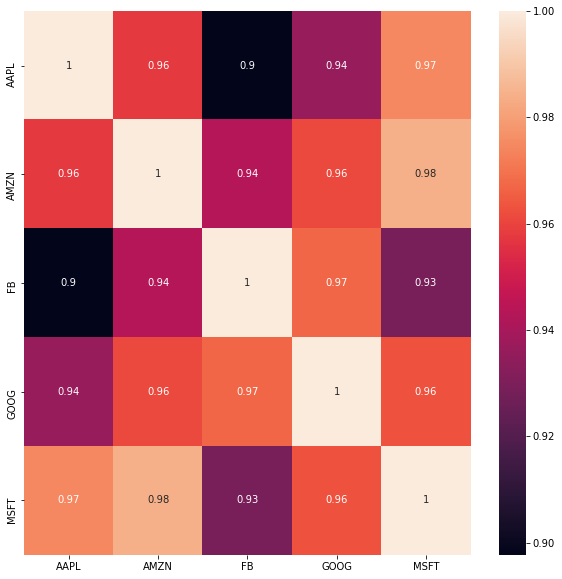

In [5]:
#then make a correlation matrix
df_corr = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(df_corr, annot = True)

<AxesSubplot:>

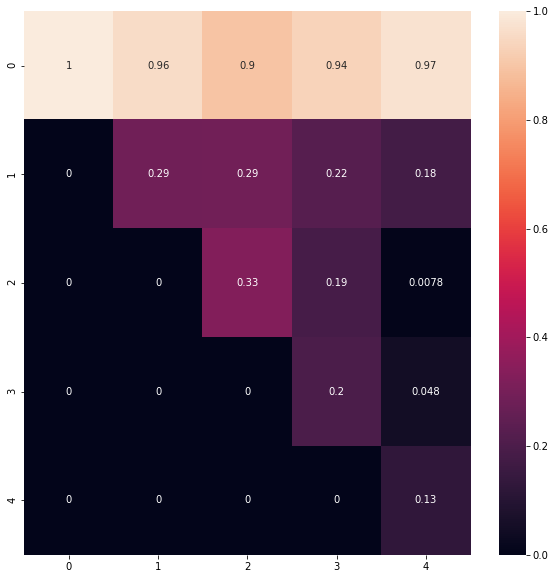

In [6]:
#cholseky decomposition
R = np.linalg.cholesky(df_corr)

#the transpose to get the conjugate
RT = R.T.conj()

plt.figure(figsize = (10,10))
sns.heatmap(RT, annot = True)

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2011-06-03,10.547321,188.320007,NaN,260.563354,19.159355
2011-06-06,10.381486,185.690002,NaN,259.557129,19.239487
2011-06-07,10.197216,187.550003,NaN,258.545898,19.279551
2011-06-08,10.203362,188.050003,NaN,258.615631,19.183393
2011-06-09,10.180327,189.679993,NaN,257.400208,19.199417


In [8]:
for i in df.columns:
    df[i + "PctChg"] = df[i].pct_change().dropna()
    
df.head()

,AAPL,AMZN,FB,GOOG,MSFT,AAPLPctChg,AMZNPctChg,FBPctChg,GOOGPctChg,MSFTPctChg
Date,,,,,,,,,,
2011-06-03,10.547321,188.320007,NaN,260.563354,19.159355,NaN,NaN,NaN,NaN,NaN
2011-06-06,10.381486,185.690002,NaN,259.557129,19.239487,-0.015723,-0.013966,NaN,-0.003862,0.004182
2011-06-07,10.197216,187.550003,NaN,258.545898,19.279551,-0.017750,0.010017,NaN,-0.003896,0.002082
2011-06-08,10.203362,188.050003,NaN,258.615631,19.183393,0.000603,0.002666,NaN,0.000270,-0.004988
2011-06-09,10.180327,189.679993,NaN,257.400208,19.199417,-0.002258,0.008668,NaN,-0.004700,0.000835
